In [455]:
import re
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
mpl.rcParams['figure.figsize'] = [16,9]
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [457]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [459]:
for col in df.columns:
    print(f'{col} - {df[col].unique()} - {len(df[col].unique())}')

PassengerId - [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [461]:
df['Sex'] = pd.factorize(df['Sex'])[0]

In [463]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df[df['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S


In [13]:
df[df['Survived']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [473]:
avg = df['Age'].median()
avg

28.0

In [475]:
df['Age'].fillna(avg, inplace=True)

In [477]:
df["Age"] = df["Age"].astype(int)

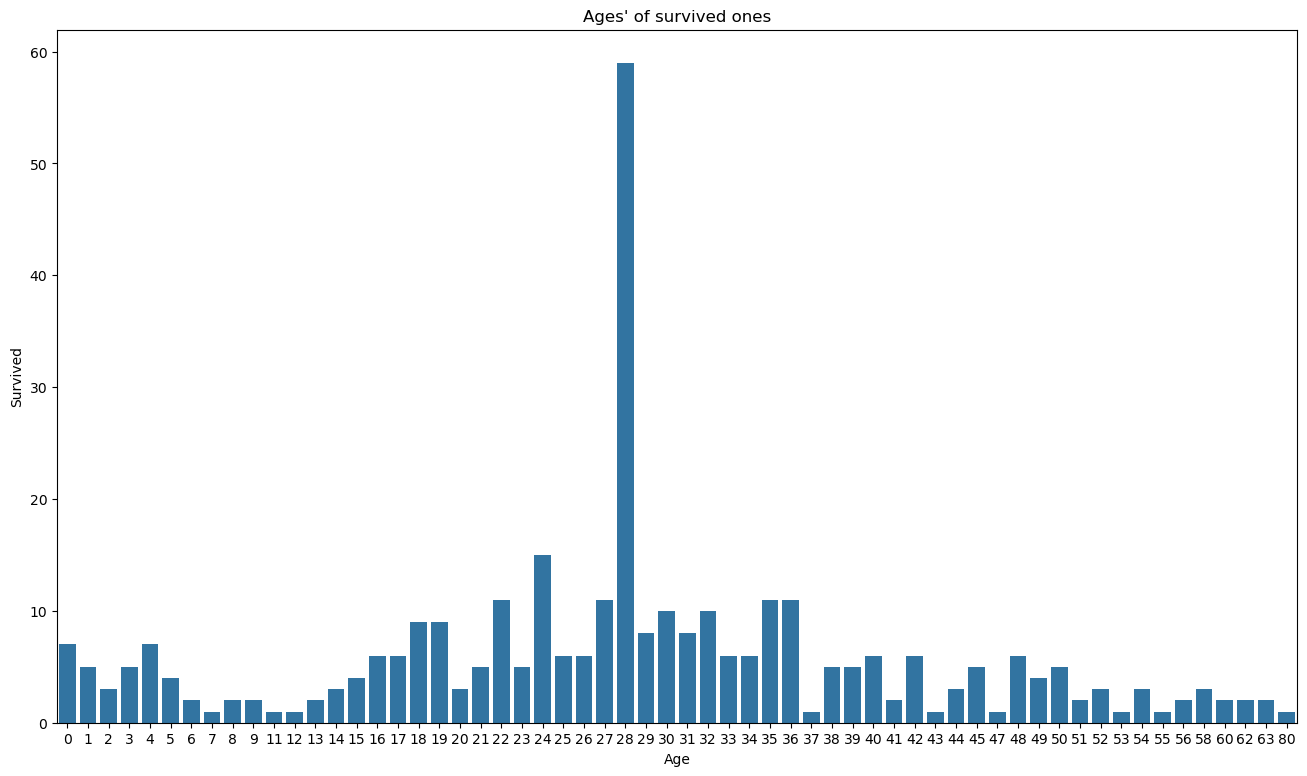

In [55]:
age = df[df['Survived'] == 1].groupby('Age')['Survived'].count().reset_index()
sns.barplot(data=age, x='Age', y='Survived')
plt.title("Ages' of survived ones")
plt.show()

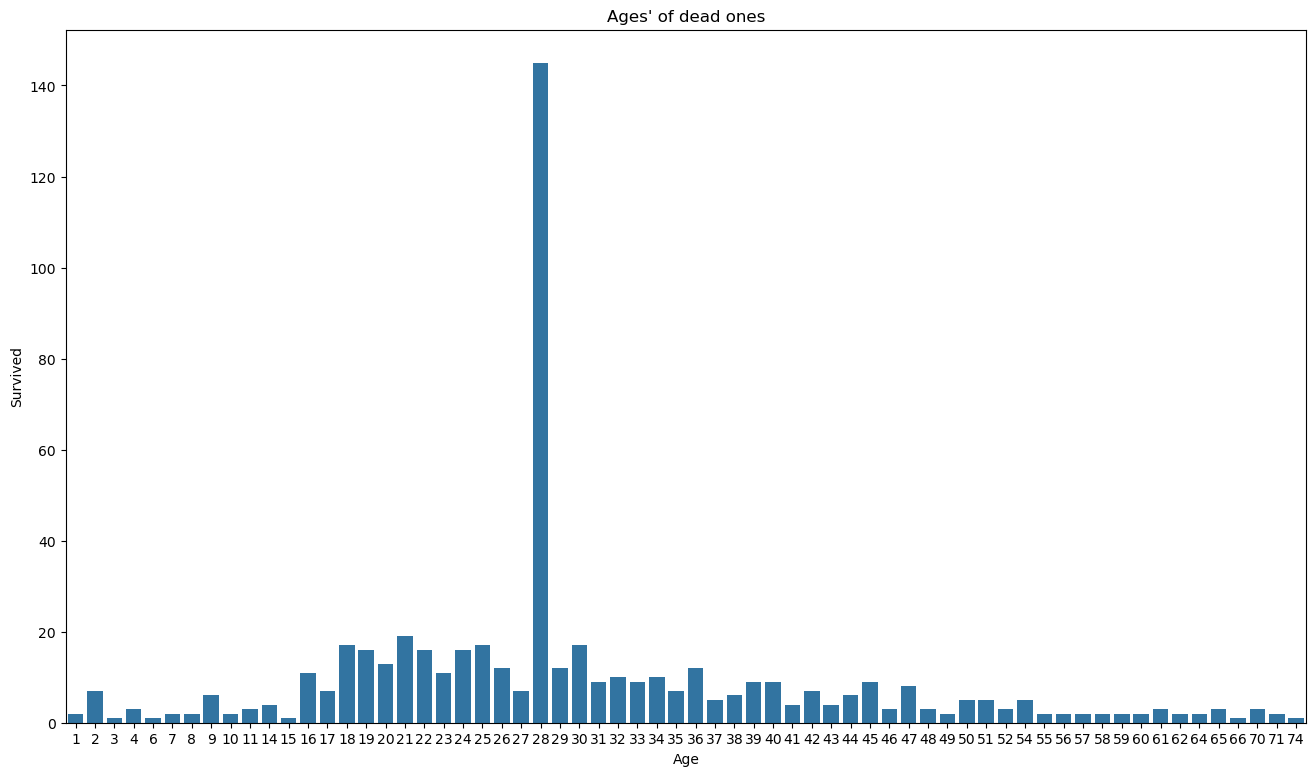

In [57]:
age = df[df['Survived'] == 0].groupby('Age')['Survived'].count().reset_index()
sns.barplot(data=age, x='Age', y='Survived')
plt.title("Ages' of dead ones")
plt.show()

In [85]:
pc = df['Pclass'].groupby(df['Survived'])

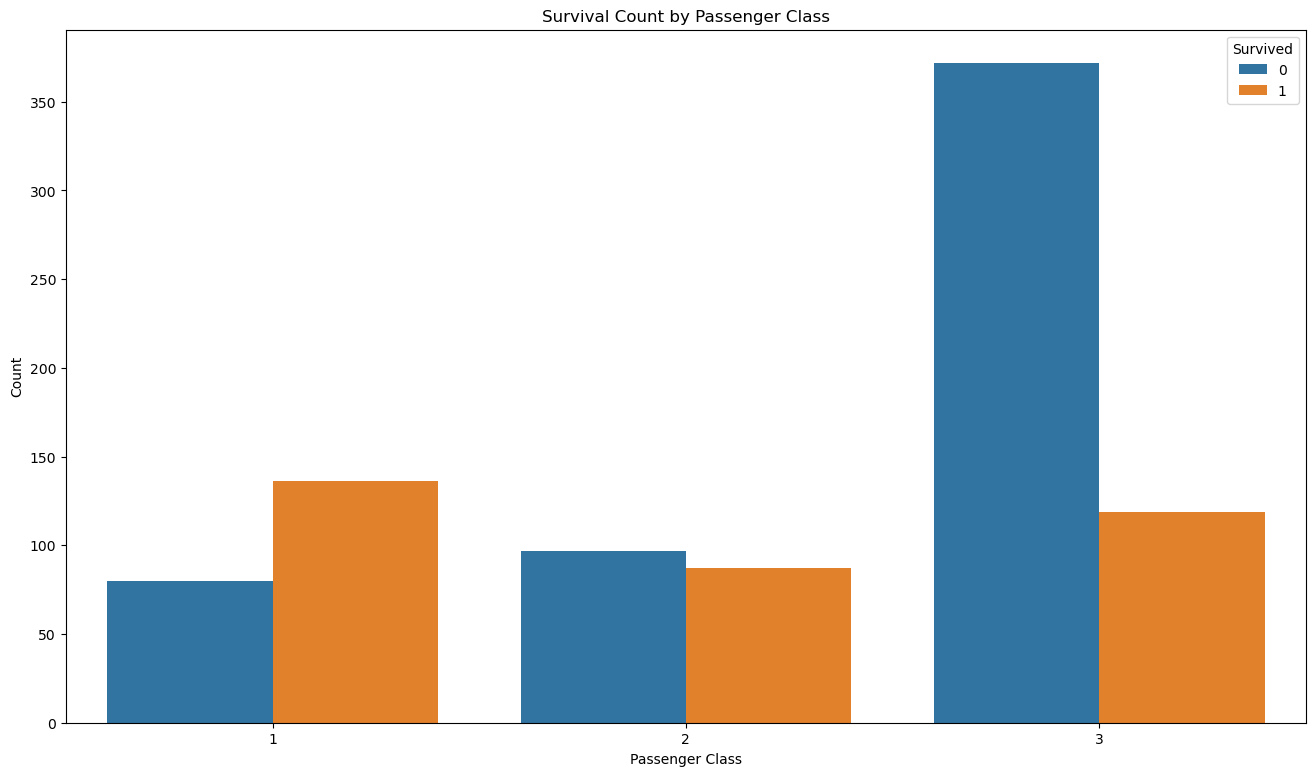

In [115]:
sns.barplot(data=df, x="Pclass", y="Survived", hue="Survived", estimator=lambda x: len(x))
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.legend(title="Survived")
plt.show()

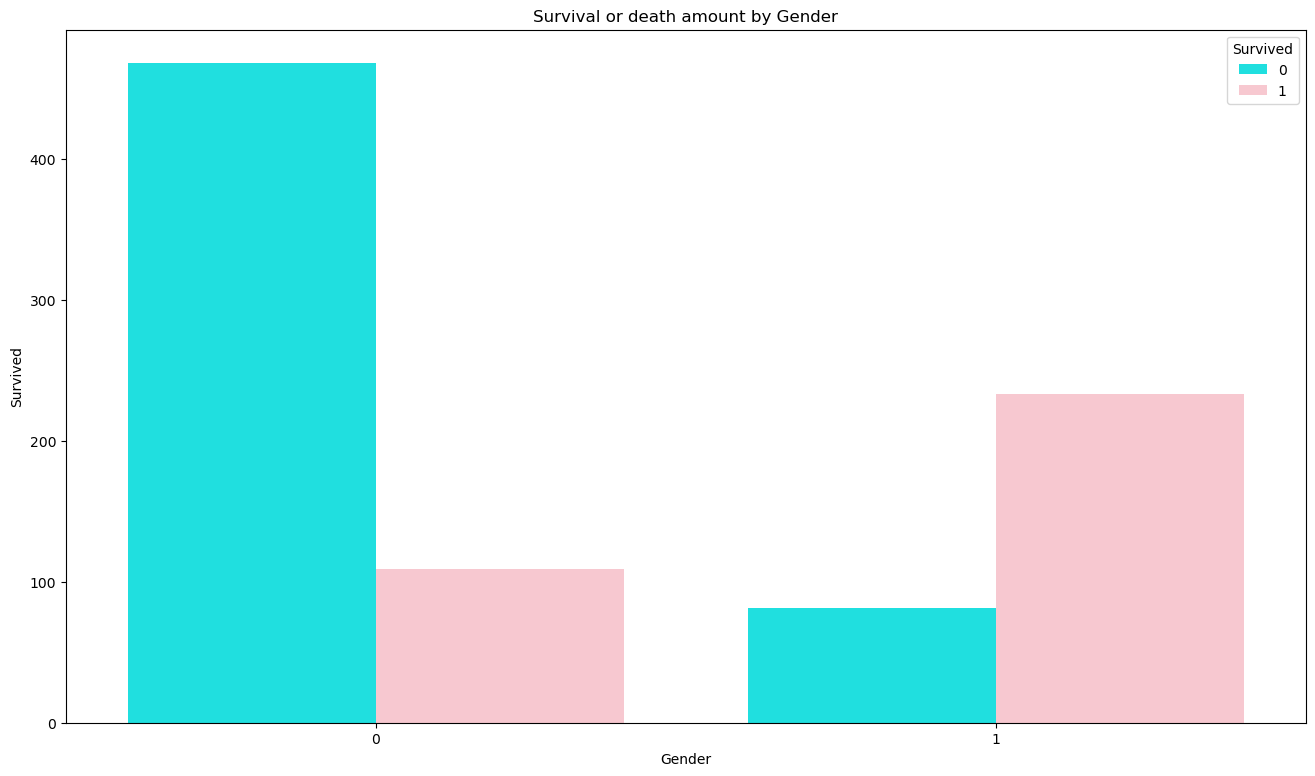

In [133]:
sns.barplot(data=df, x='Sex', y='Survived',hue='Survived',estimator=lambda x: len(x), palette=['cyan','pink'])
plt.title("Survival or death amount by Gender")
plt.xlabel('Gender')
plt.show()

In [111]:
df[df['Survived']==1].count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            342
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          342
Embarked       342
dtype: int64

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [465]:
df['Embarked'].fillna('S',inplace=True)

In [467]:
df['Embarked'] = pd.factorize(df['Embarked'])[0]

In [469]:
df.duplicated().sum()

0

In [471]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [479]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [481]:
df['Cabin'].fillna('Other',inplace=True)

In [483]:
df['Cabin'].value_counts()

Cabin
Other          687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

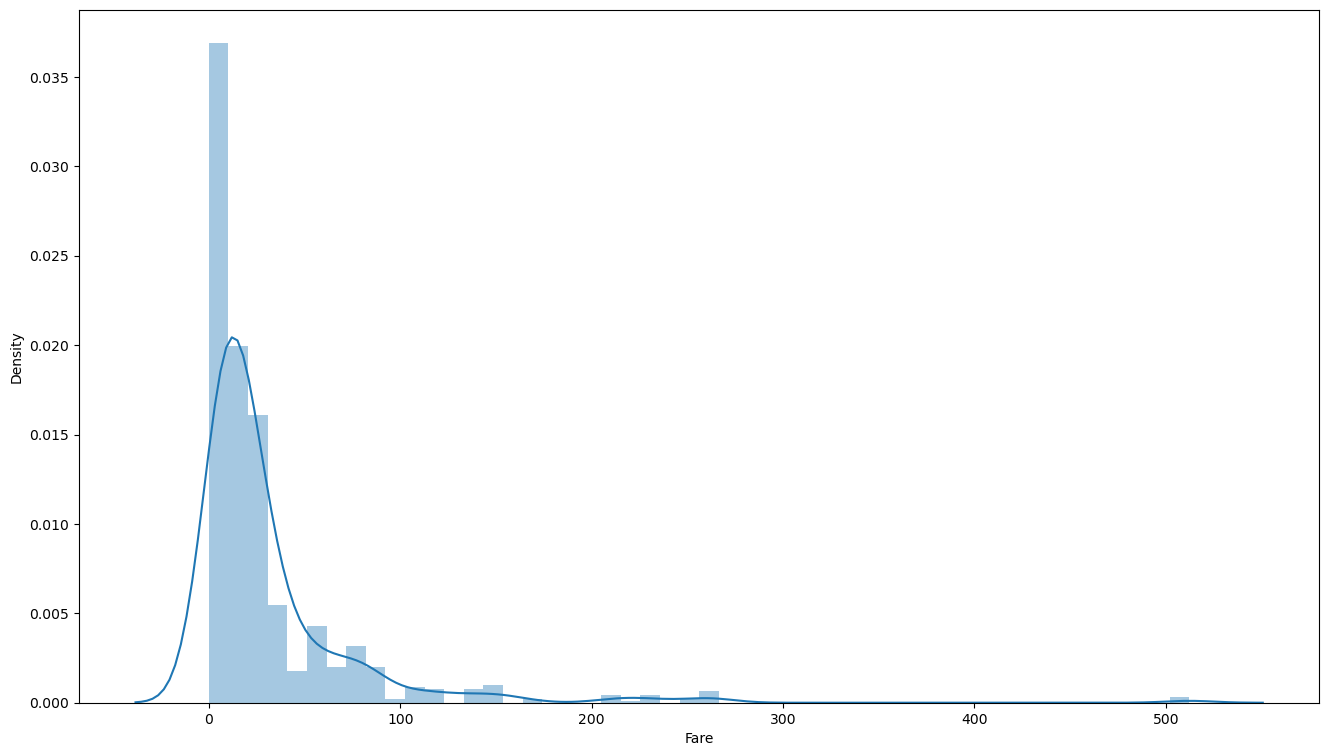

In [658]:
sns.distplot(df['Fare'])
plt.show()

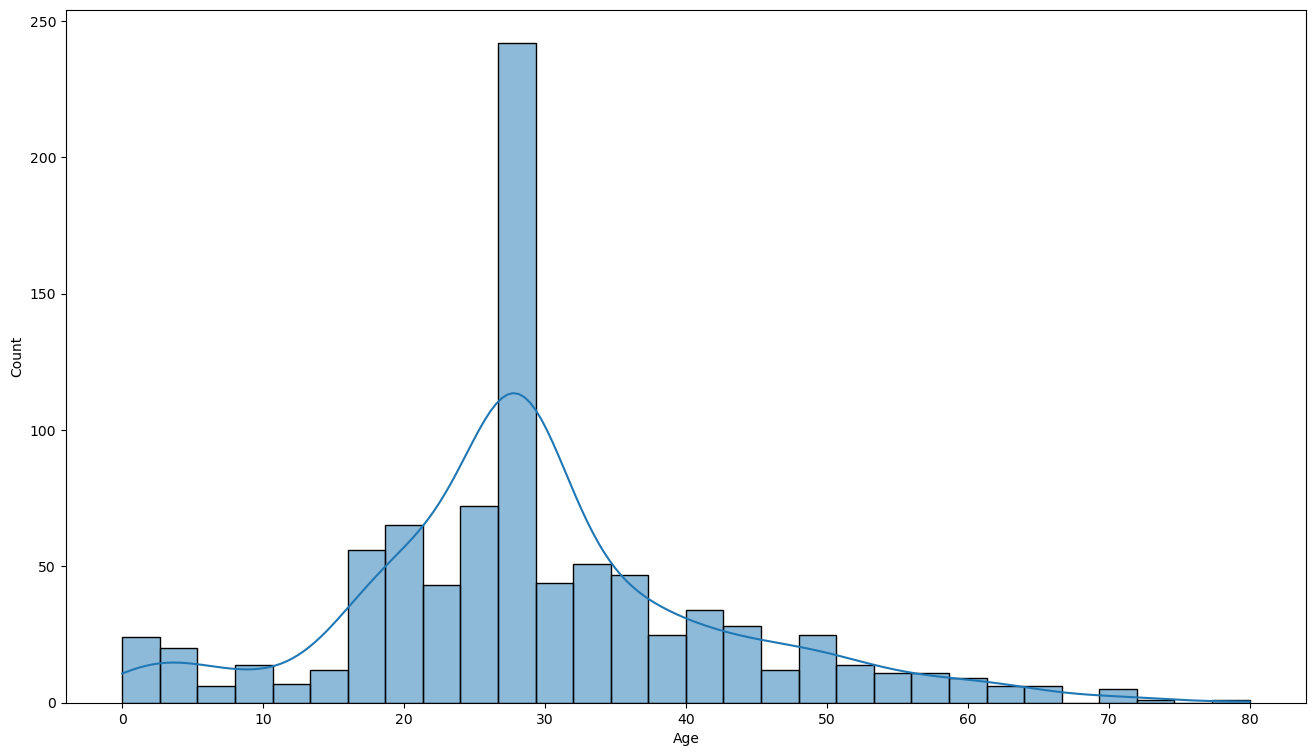

In [660]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

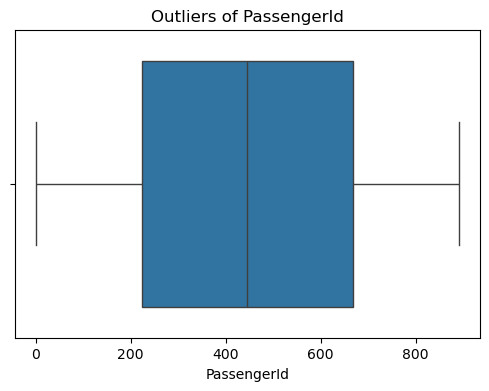

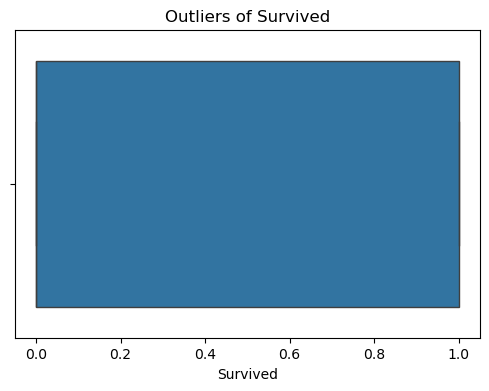

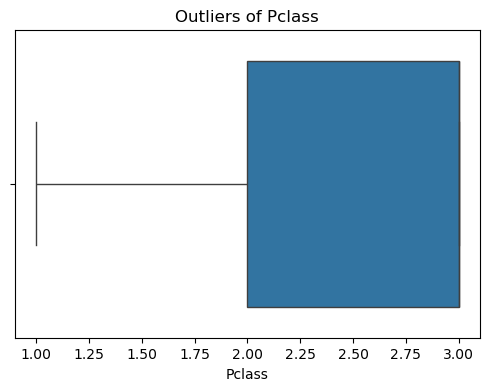

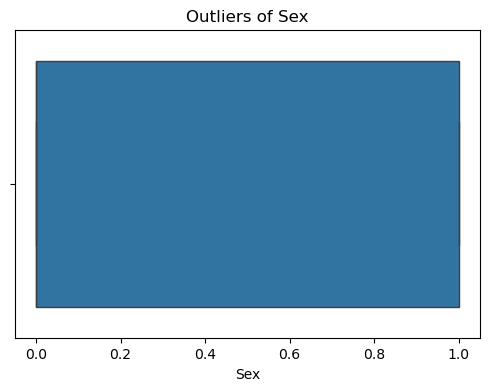

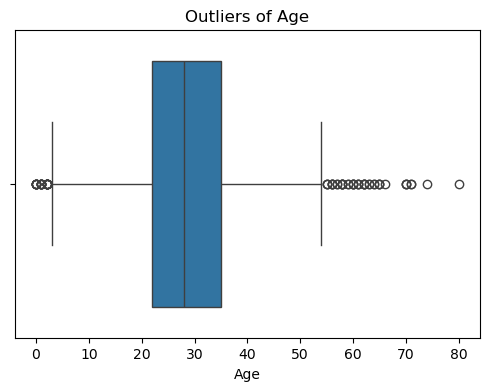

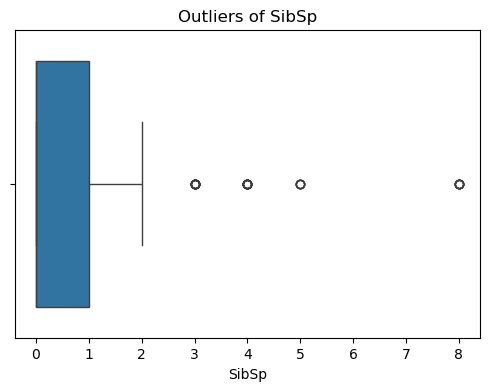

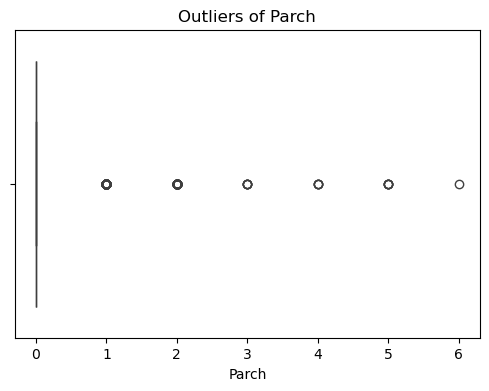

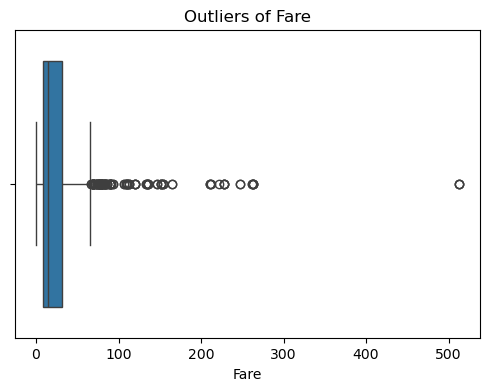

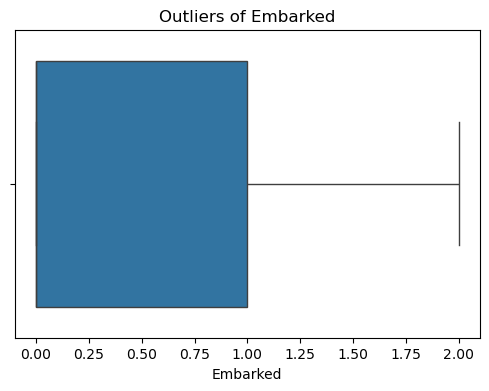

In [297]:
for i in df.select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(6,4))
    plt.title(f'Outliers of {i}')
    sns.boxplot(data=df, x=i)
    plt.show()

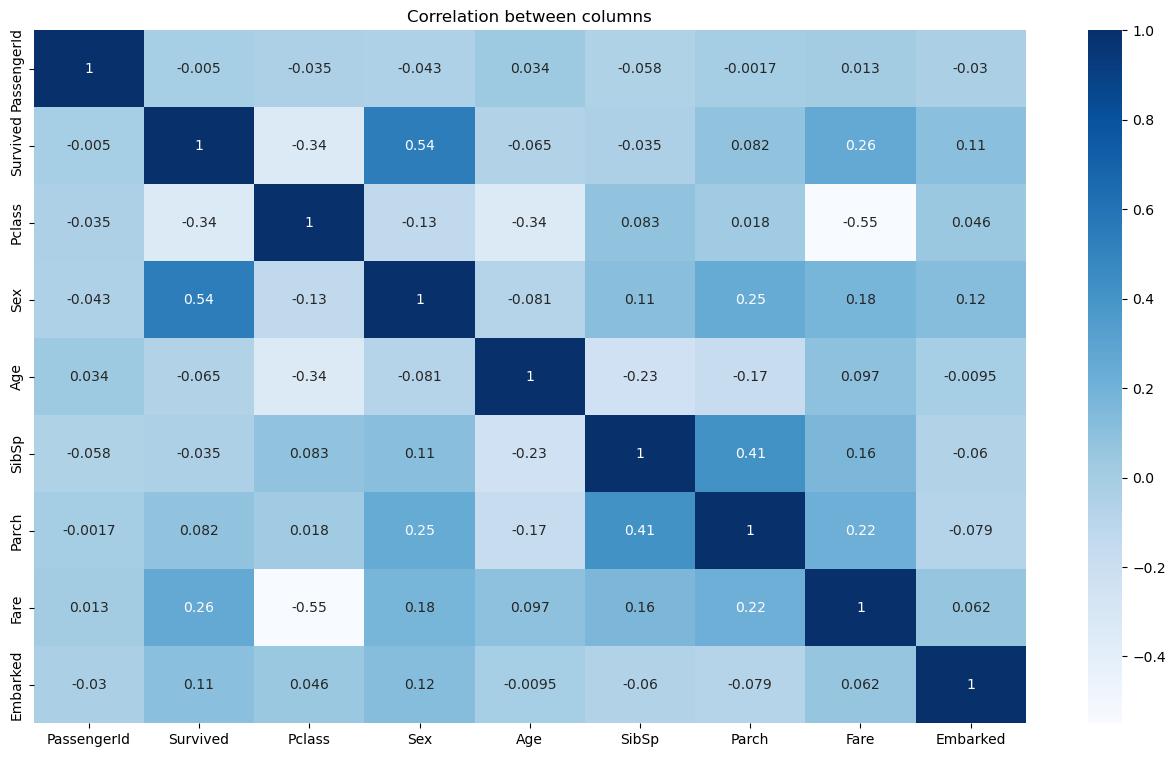

In [53]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title("Correlation between columns")
plt.show()

In [485]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.345679,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [487]:
min_max_scaler = MinMaxScaler()
df_scaler = min_max_scaler.fit_transform(df.select_dtypes(exclude=['object']))
df_scaler = pd.DataFrame(df_scaler, columns = df.select_dtypes(exclude=['object']).columns)

In [489]:
df_scaler

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,0.0,1.0,0.0,0.2750,0.125,0.000000,0.014151,0.0
1,0.001124,1.0,0.0,1.0,0.4750,0.125,0.000000,0.139136,0.5
2,0.002247,1.0,1.0,1.0,0.3250,0.000,0.000000,0.015469,0.0
3,0.003371,1.0,0.0,1.0,0.4375,0.125,0.000000,0.103644,0.0
4,0.004494,0.0,1.0,0.0,0.4375,0.000,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.0,0.3375,0.000,0.000000,0.025374,0.0
887,0.996629,1.0,0.0,1.0,0.2375,0.000,0.000000,0.058556,0.0
888,0.997753,0.0,1.0,1.0,0.3500,0.125,0.333333,0.045771,0.0
889,0.998876,1.0,0.0,0.0,0.3250,0.000,0.000000,0.058556,0.5


In [491]:
X = df_scaler.drop('Survived',axis=1)
y = df_scaler['Survived']

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

In [495]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [581]:
def compute_metrics(model):
    model.fit(scaled_X_train, y_train)
    predictions = model.predict(scaled_X_test)
    return {'Accuracy score': accuracy_score(predictions, y_test),
            'R2 score': r2_score(predictions, y_test),
            'Mean Absolute Error score': mean_absolute_error(predictions, y_test),
            'Mean Square Error score': mean_squared_error(predictions, y_test)}
            
def return_confusion_matrix(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return confusion_matrix(y_true= y_test, y_pred= predictions, labels= [0, 1])

In [682]:
def pred_result(model):
    model.fit(scaled_X_train, y_train)
    predictions = model.predict(scaled_X_test)
    return pd.DataFrame(predictions, y_test)

In [569]:
random_for = compute_metrics(RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2))

In [570]:
random_for

{'Accuracy score': 0.8156424581005587,
 'R2 score': 0.17935537649347066,
 'Mean Absolute Error score': 0.18435754189944134,
 'Mean Square Error score': 0.18435754189944134}

In [379]:
knn = compute_metrics(KNeighborsClassifier())

In [381]:
knn

{'Accuracy score': 0.7821229050279329,
 'R2 score': 0.08023715415019772,
 'Mean Absolute Error score': 0.21787709497206703,
 'Mean Square Error score': 0.21787709497206703}

In [629]:
svc = compute_metrics(SVC())

In [631]:
svc

{'Accuracy score': 0.7932960893854749,
 'R2 score': 0.047598504457866175,
 'Mean Absolute Error score': 0.20670391061452514,
 'Mean Square Error score': 0.20670391061452514}

In [387]:
log_reg = compute_metrics(LogisticRegression())

In [389]:
log_reg

{'Accuracy score': 0.7877094972067039,
 'R2 score': 0.0988341282458931,
 'Mean Absolute Error score': 0.2122905027932961,
 'Mean Square Error score': 0.2122905027932961}

In [391]:
xgboost = compute_metrics(XGBClassifier())

In [393]:
xgboost

{'Accuracy score': 0.7653631284916201,
 'R2 score': -0.09146341463414642,
 'Mean Absolute Error score': 0.2346368715083799,
 'Mean Square Error score': 0.2346368715083799}

In [395]:
adaboost = compute_metrics(AdaBoostClassifier(learning_rate=0.1))

In [397]:
adaboost

{'Accuracy score': 0.8044692737430168,
 'R2 score': 0.15452091767881249,
 'Mean Absolute Error score': 0.19553072625698323,
 'Mean Square Error score': 0.19553072625698323}

In [399]:
dt = compute_metrics(DecisionTreeClassifier())

In [401]:
dt

{'Accuracy score': 0.7318435754189944,
 'R2 score': -0.13831478537360886,
 'Mean Absolute Error score': 0.2681564245810056,
 'Mean Square Error score': 0.2681564245810056}

In [599]:
catboost = compute_metrics(CatBoostClassifier())

Learning rate set to 0.008911
0:	learn: 0.6869773	total: 1.93ms	remaining: 1.92s
1:	learn: 0.6811438	total: 3.52ms	remaining: 1.76s
2:	learn: 0.6752059	total: 5.85ms	remaining: 1.94s
3:	learn: 0.6700969	total: 7.49ms	remaining: 1.86s
4:	learn: 0.6647401	total: 9.68ms	remaining: 1.93s
5:	learn: 0.6594979	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6547033	total: 14ms	remaining: 1.98s
7:	learn: 0.6498309	total: 16.7ms	remaining: 2.06s
8:	learn: 0.6452508	total: 18.2ms	remaining: 2s
9:	learn: 0.6397516	total: 20.7ms	remaining: 2.05s
10:	learn: 0.6355359	total: 22.2ms	remaining: 2s
11:	learn: 0.6306797	total: 24.6ms	remaining: 2.02s
12:	learn: 0.6266020	total: 26.4ms	remaining: 2.01s
13:	learn: 0.6220633	total: 28.6ms	remaining: 2.02s
14:	learn: 0.6176527	total: 31ms	remaining: 2.03s
15:	learn: 0.6130965	total: 33.2ms	remaining: 2.04s
16:	learn: 0.6089691	total: 35.7ms	remaining: 2.06s
17:	learn: 0.6051347	total: 37.5ms	remaining: 2.05s
18:	learn: 0.6012520	total: 40ms	remaining: 2.06s
19:	

In [601]:
catboost

{'Accuracy score': 0.8044692737430168,
 'R2 score': 0.15452091767881249,
 'Mean Absolute Error score': 0.19553072625698323,
 'Mean Square Error score': 0.19553072625698323}

In [583]:
return_confusion_matrix(KNeighborsClassifier())

array([[90, 15],
       [22, 52]])

In [617]:
rmc_cm = return_confusion_matrix(RandomForestClassifier())
rmc_cm

array([[93, 12],
       [18, 56]])

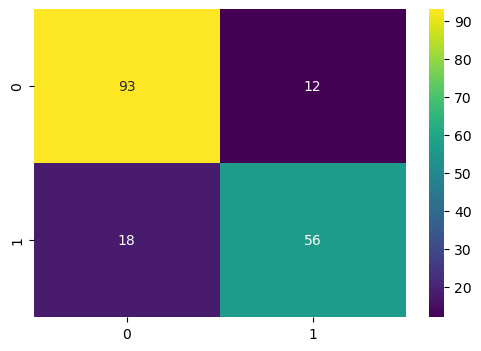

In [619]:
plt.figure(figsize=(6,4))
sns.heatmap(rmc_cm,annot=True,cmap='viridis')
plt.show()

In [621]:
svc_cm = return_confusion_matrix(SVC())
svc_cm

array([[95, 10],
       [27, 47]])

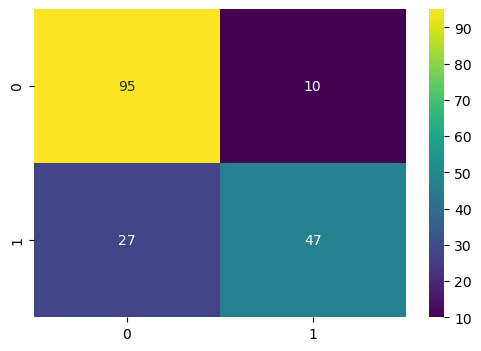

In [623]:
plt.figure(figsize=(6,4))
sns.heatmap(svc_cm,annot=True,cmap='viridis')
plt.show()

In [589]:
return_confusion_matrix(LogisticRegression())

array([[89, 16],
       [22, 52]])

In [591]:
return_confusion_matrix(XGBClassifier())

array([[87, 18],
       [17, 57]])

In [593]:
return_confusion_matrix(AdaBoostClassifier())

array([[89, 16],
       [22, 52]])

In [595]:
return_confusion_matrix(CatBoostClassifier())

Learning rate set to 0.008911
0:	learn: 0.6869773	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.6811438	total: 76.1ms	remaining: 38s
2:	learn: 0.6752059	total: 79.1ms	remaining: 26.3s
3:	learn: 0.6700969	total: 81ms	remaining: 20.2s
4:	learn: 0.6647401	total: 82.9ms	remaining: 16.5s
5:	learn: 0.6594979	total: 84.7ms	remaining: 14s
6:	learn: 0.6547033	total: 87.6ms	remaining: 12.4s
7:	learn: 0.6498309	total: 88.8ms	remaining: 11s
8:	learn: 0.6452508	total: 89.5ms	remaining: 9.86s
9:	learn: 0.6397516	total: 90.6ms	remaining: 8.97s
10:	learn: 0.6355359	total: 92.5ms	remaining: 8.32s
11:	learn: 0.6306797	total: 93.6ms	remaining: 7.7s
12:	learn: 0.6266020	total: 94.2ms	remaining: 7.15s
13:	learn: 0.6220633	total: 95ms	remaining: 6.69s
14:	learn: 0.6176527	total: 96.1ms	remaining: 6.31s
15:	learn: 0.6130965	total: 97.1ms	remaining: 5.97s
16:	learn: 0.6089691	total: 98.1ms	remaining: 5.67s
17:	learn: 0.6051347	total: 99.2ms	remaining: 5.41s
18:	learn: 0.6012520	total: 100ms	remaining: 5.18s
19:

array([[92, 13],
       [22, 52]])

In [597]:
return_confusion_matrix(DecisionTreeClassifier())

array([[82, 23],
       [24, 50]])

In [684]:
pred_result(KNeighborsClassifier())

,0
Survived,
1.0,0.0
0.0,0.0
0.0,0.0
1.0,1.0
1.0,0.0
...,...
0.0,0.0
0.0,0.0
1.0,0.0


In [686]:
pred_result(SVC())

,0
Survived,
1.0,0.0
0.0,0.0
0.0,0.0
1.0,1.0
1.0,1.0
...,...
0.0,0.0
0.0,0.0
1.0,0.0


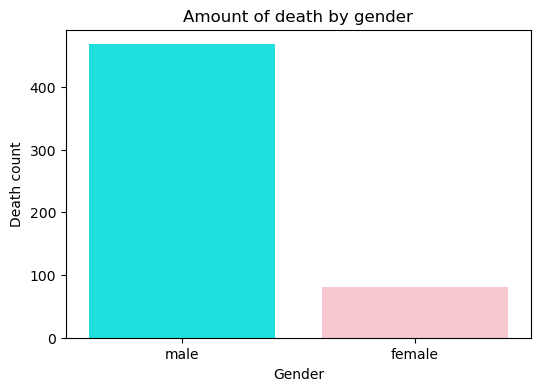

In [664]:
death_count_by_sex = df[df['Survived'] == 0].groupby('Sex')['Survived'].count().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=death_count_by_sex, x='Sex', y='Survived', palette=['cyan','pink'])
plt.title('Amount of death by gender')
plt.xticks(ticks=[0,1],labels=['male','female'])
plt.ylabel("Death count")
plt.xlabel("Gender")
plt.show()	

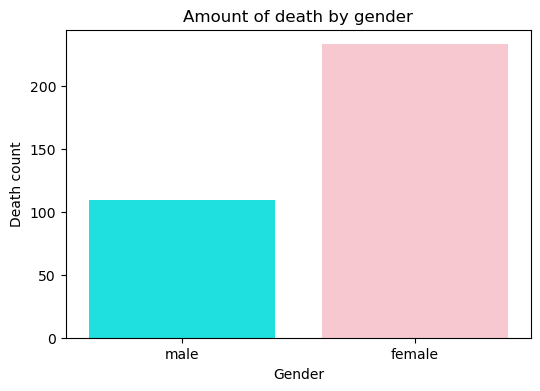

In [666]:
death_count_by_sex = df[df['Survived'] == 1].groupby('Sex')['Survived'].count().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=death_count_by_sex, x='Sex', y='Survived', palette=['cyan','pink'])
plt.title('Amount of death by gender')
plt.xticks(ticks=[0,1],labels=['male','female'])
plt.ylabel("Death count")
plt.xlabel("Gender")
plt.show()	

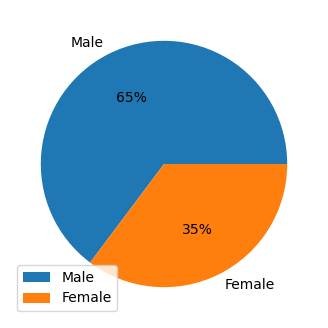

In [676]:
plt.figure(figsize=(6,4))
ls=[df['Sex'].value_counts()[0],df['Sex'].value_counts()[1]]
plt.pie(ls,autopct='%1.f%%',labels=['Male','Female'])
plt.legend()
plt.show()

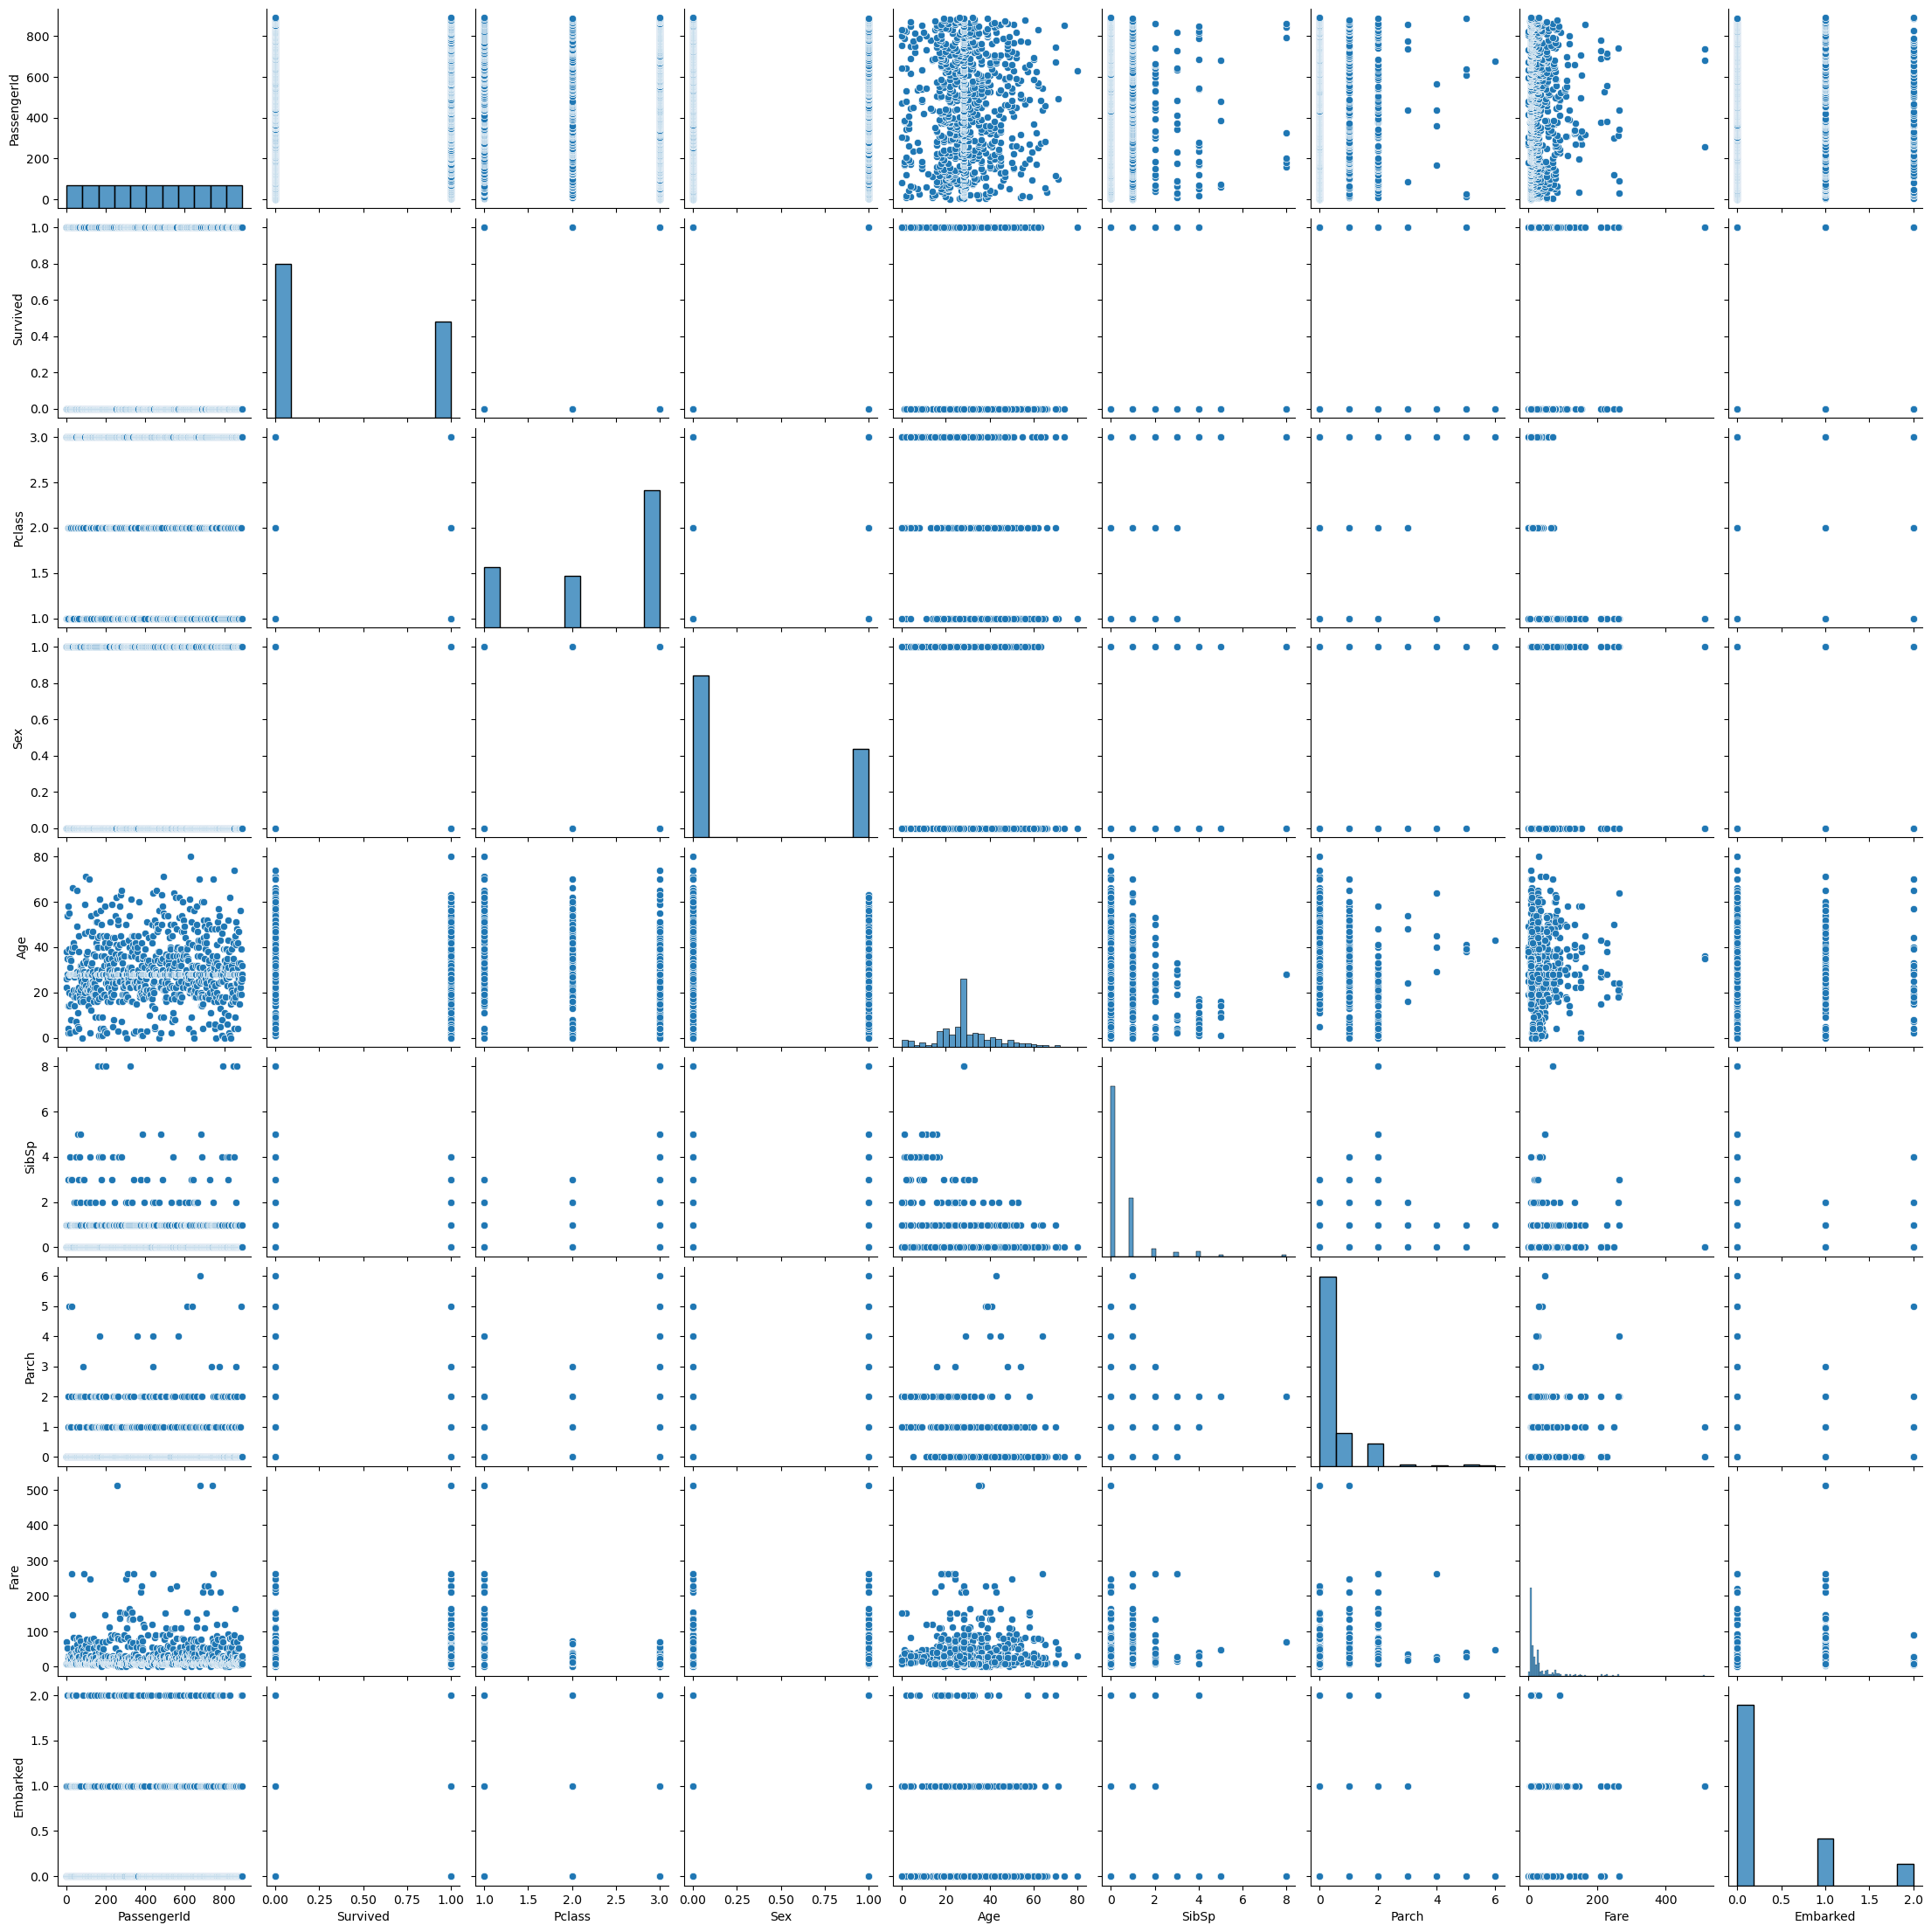

In [680]:
sns.pairplot(data=df)